In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load DataFrame
df = pd.read_csv('train_data.csv')

# Display the first few rows to understand the data structure
print(df.head())

         job_id  memory_GB  network_log10_MBps  local_IO_log10_MBps  \
0  jobID1634295    44.3904             -1.0262               0.8033   
1  jobID2033452    31.5839             -1.4608              -0.6080   
2  jobID2068800   154.4610             -0.5508              -0.3637   
3    jobID78826    71.8570              3.5701              -0.1281   
4  jobID2935014    30.0370              3.3094              -0.9463   

   NFS_IO_log10_MBps  failed  
0            -3.0000       0  
1            -2.9967       0  
2            -3.0000       0  
3             2.3040       0  
4            -3.0000       0  


In [3]:
# Split the data into features and target variable
X = df.drop(['job_id', 'failed'], axis=1)  # Features
y = df['failed']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM model
svm_model = SVC(kernel='rbf', random_state=42, class_weight='balanced')

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate the balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Model Complete Balanced Accuracy: {balanced_acc}")

Model Complete Balanced Accuracy: 0.7241804353527406


In [4]:
# Apply PCA to use 3 new features
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM model using PCA-transformed data
svm_model_pca = SVC(kernel='rbf', random_state=42, class_weight='balanced')
svm_model_pca.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test set
y_pred_pca = svm_model_pca.predict(X_test_pca)

# Calculate the balanced accuracy for Model Abridged
balanced_acc_pca = balanced_accuracy_score(y_test, y_pred_pca)
print(f"Model Abridged Balanced Accuracy: {balanced_acc_pca}")

Model Abridged Balanced Accuracy: 0.697644024827345


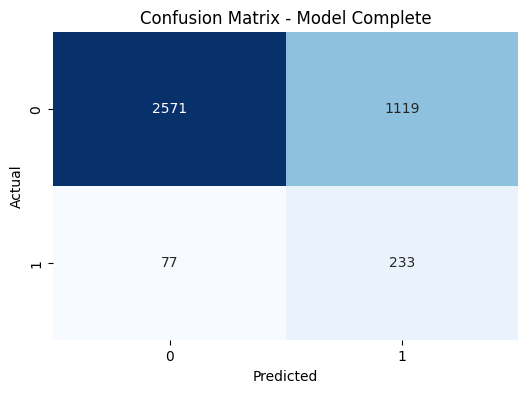

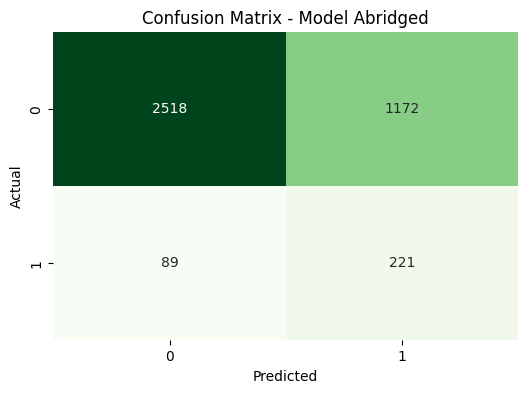

In [5]:
# Confusion Matrix for Model Complete
conf_matrix_complete = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix for Model Complete
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_complete, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Model Complete')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Model Abridged
conf_matrix_abridged = confusion_matrix(y_test, y_pred_pca)

# Plotting confusion matrix for Model Abridged
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_abridged, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Model Abridged')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
# Now create models using the entire dataset

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create SVM model
svm_model_true = SVC(kernel='rbf', random_state=42, class_weight='balanced')

# Train the SVM model
svm_model_true.fit(X_scaled, y)

# Apply PCA to use 3 new features
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Train SVM model using PCA-transformed data
svm_model_pca_true = SVC(kernel='rbf', random_state=42, class_weight='balanced')
svm_model_pca_true.fit(X_pca, y)

SVC(class_weight='balanced', random_state=42)

In [7]:
# Load test data
df_test = pd.read_csv('test_data.csv')

# Split the data into features and target variable
X_test_data = df_test.drop(['job_id', 'failed'], axis=1)  # Features
y_test_data = df_test['failed']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_test_data_scaled = scaler.fit_transform(X_test_data)

In [8]:
# Make predictions on the test set (Complete Model)
y_pred_true = svm_model_true.predict(X_test_data_scaled)

# Calculate the balanced accuracy
balanced_acc_true = balanced_accuracy_score(y_test_data, y_pred_true)
print(f"Model Complete Balanced Accuracy from Test Data: {balanced_acc_true}")

Model Complete Balanced Accuracy from Test Data: 0.7299240691329303


In [9]:
# Apply PCA to test data
pca = PCA(n_components=3)
X_pca_true = pca.fit_transform(X_test_data_scaled)

# Make predictions on the PCA-transformed test set (Model Abridged)
y_pred_pca_true = svm_model_pca_true.predict(X_pca_true)

# Calculate the balanced accuracy for Model Abridged
balanced_acc_pca_true = balanced_accuracy_score(y_test_data, y_pred_pca_true)
print(f"Model Abridged Balanced Accuracy from Test Data: {balanced_acc_pca_true}")

Model Abridged Balanced Accuracy from Test Data: 0.715642999741198


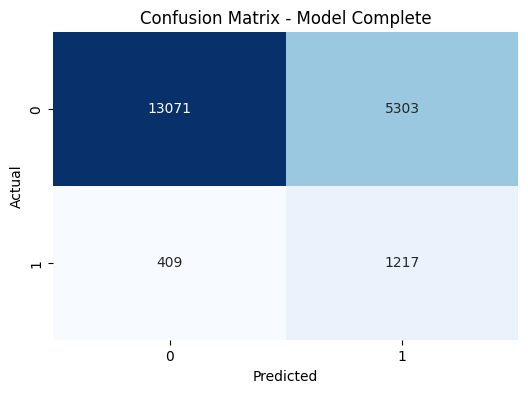

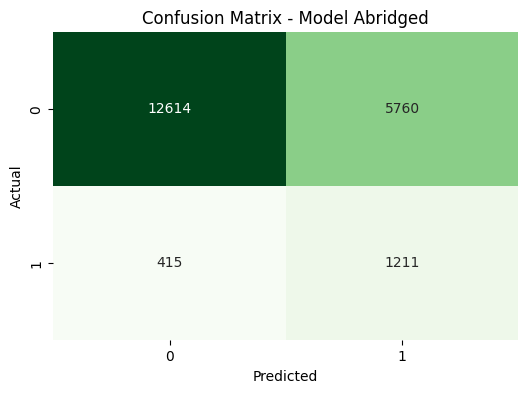

In [10]:
# Confusion Matrix for Model Complete
conf_matrix_complete = confusion_matrix(y_test_data, y_pred_true)

# Plotting confusion matrix for Model Complete
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_complete, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Model Complete')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Model Abridged
conf_matrix_abridged = confusion_matrix(y_test_data, y_pred_pca_true)

# Plotting confusion matrix for Model Abridged
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_abridged, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Model Abridged')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()